In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go

In [9]:
# Step 1
def g0(x0):
    """g0(x0) = sin(x0)"""
    return np.sin(x0)

def g1(x0, x1):
    """g1(x0, x1) = x0 * x1"""
    return x0 * x1

def g2(x, y, r):
    """
    g2(x, y, r):
      returns x if r > 0,
      returns y if r < 0,
      returns 0 if r == 0 (rare for continuous r)
    """
    return np.where(r > 0, x, np.where(r < 0, y, 0))

def g3(x0, x1):
    """g3(x0, x1) = x0 + x1"""
    return x0 + x1

# Define a composed function F that uses all gi
def F(x0, x1, x2, x3):
    """
    Example composition:
      F(x0, x1, x2, x3) = g2(g0(x0), g1(x1, x2), x3)+g3(x0,x2)
    """
    return g2(g0(x0), g1(x1, x2), x3)+g3(x0,x2)

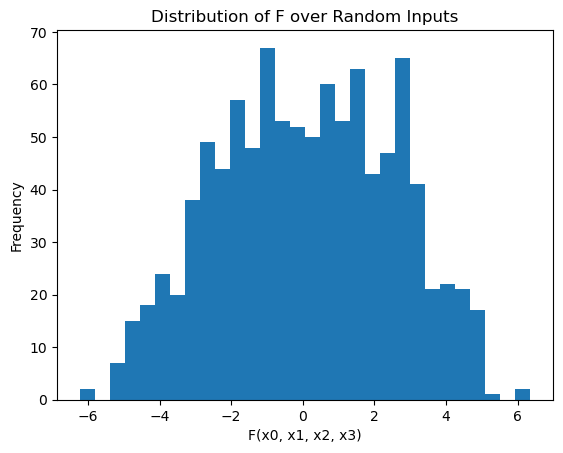

In [19]:
# Generate random inputs
n_samples = 1000
X0 = np.random.uniform(-np.pi, np.pi, size=n_samples)
X1 = np.random.uniform(-1, 1, size=n_samples)
X2 = np.random.uniform(-2, 2, size=n_samples)
X3 = np.random.uniform(-1, 1, size=n_samples)

# Evaluate F
Y = F(X0, X1, X2, X3)

# Histogram of F values
plt.figure()
plt.hist(Y, bins=30)
plt.xlabel('F(x0, x1, x2, x3)')
plt.ylabel('Frequency')
plt.title('Distribution of F over Random Inputs')
plt.show()

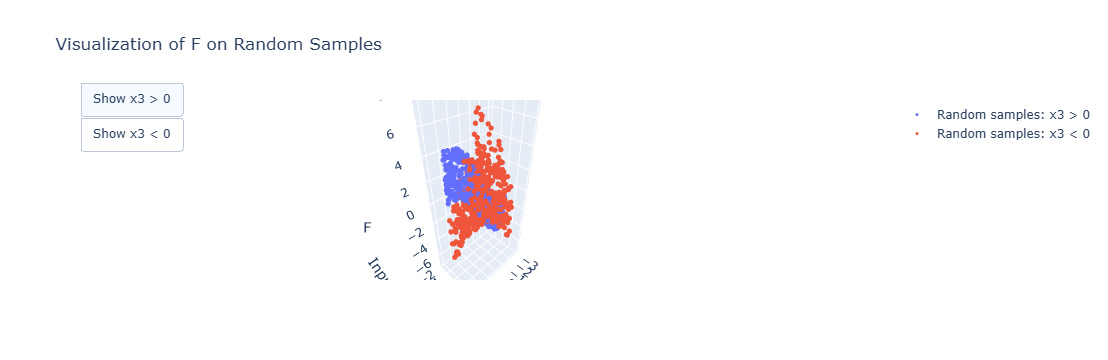

In [18]:
# Masks for the two regimes
mask_pos = X3 > 0
mask_neg = X3 < 0

# Build an interactive Plotly figure using random samples
fig = go.Figure()

# Regime x3 > 0: scatter of (x0, 0, F)
fig.add_trace(go.Scatter3d(
    x=X0[mask_pos],
    y=np.zeros(mask_pos.sum()),
    z=Y[mask_pos],
    mode='markers',
    marker=dict(size=3),
    name='Random samples: x3 > 0'
))

# Regime x3 < 0: scatter of (x1, x2, F)
fig.add_trace(go.Scatter3d(
    x=X1[mask_neg],
    y=X2[mask_neg],
    z=Y[mask_neg],
    mode='markers',
    marker=dict(size=3),
    name='Random samples: x3 < 0'
))

# Add toggle buttons to switch between regimes
fig.update_layout(
    title="Visualization of F on Random Samples",
    scene=dict(xaxis_title='Input X', yaxis_title='Input Y or Constant', zaxis_title='F'),
    updatemenus=[dict(
        type="buttons",
        showactive=True,
        buttons=[
            dict(
                label="Show x3 > 0",
                method="update",
                args=[{"visible": [True, False]},
                      {"title": "F on random X0 (x3 > 0)",
                       "scene": {"xaxis_title": "x0",
                                 "yaxis_title": "constant 0",
                                 "zaxis_title": "F"}}]
            ),
            dict(
                label="Show x3 < 0",
                method="update",
                args=[{"visible": [False, True]},
                      {"title": "F on random (x1, x2) (x3 < 0)",
                       "scene": {"xaxis_title": "x1",
                                 "yaxis_title": "x2",
                                 "zaxis_title": "F"}}]
            ),
        ],
        x=0, xanchor="left", y=1.1, yanchor="top"
    )]
)

In [27]:

# Save and output path
html_path = 'C:/Users/hurst/anaconda_projects/OOD/F_visualisation.html'
fig.write_html(html_path, include_plotlyjs='cdn')

print(f"Interactive plot saved: sandbox:{html_path}")



Interactive plot saved: sandbox:C:/Users/hurst/anaconda_projects/OOD/F_visualisation.html
